In [ ]:
#NOT PART OF ASSIGNMENT
#Incase I make mistake in calculation, thus writing this code to make sure I chose correct dataset
student_id = input("Enter your 8-digit student ID: ")

if len(student_id) == 8 and student_id.isdigit():
    last_4_digits = student_id[-4:]

    total = int(last_4_digits[0]) + int(last_4_digits[1]) + int(last_4_digits[2]) + int(last_4_digits[3])

    dataset_number = (total % 5) + 1
    datasets = ["1. Housing Price", "2. Housing Price Prediction Data", "3. Gold Price Prediction Dataset", "4. Wine Quality", "5. Ford Car Price Prediction"]

    print("Assigned Dataset is:", datasets[dataset_number - 1])
else:
    print("Invalid ID!")


Enter your 8-digit student ID: 22101672
Assigned Dataset is: 2. Housing Price Prediction Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#File Access
import pandas as pd
import numpy as np
hpp = pd.read_csv('/content/drive/MyDrive/Dataset_2/Housing Price Prediction Data - Housing Price Prediction Data.csv')

In [ ]:
hpp.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4.0,1,Rural,1969,215355.2836
1,2459,3.0,2,Rural,1980,195014.2216
2,1860,2.0,1,Suburb,1970,306891.0121
3,2294,2.0,1,Urban,1996,206786.7872
4,2130,5.0,2,Suburb,2001,272436.2391


# **Removing Null Values**

In [ ]:
#Checking for Null value
hpp.isnull().sum()

,0
SquareFeet,0
Bedrooms,35
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


In [ ]:
#Removing Null value
hpp['Bedrooms'].fillna(hpp['Bedrooms'].median(), inplace=True)
hpp.isnull().sum()

,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


# **Removing duplicate rows (if present)**

In [ ]:
hpp.duplicated().sum()
#No duplicate row present

0

# **Handling categorical variables [This DS is nominal]**

In [ ]:
hpp['Neighborhood'].unique()

array(['Rural', 'Suburb', 'Urban'], dtype=object)

In [ ]:
# Transforming 'Neighborhood' col
neighbor_cl = pd.get_dummies(hpp['Neighborhood'])
neighbor_cl.head()

,Rural,Suburb,Urban
0,True,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,True,False


# **Feature scaling**

In [ ]:
#Using MinMax scaler
from sklearn.preprocessing import MinMaxScaler

MM_scaler = MinMaxScaler()

num_cl = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']
hpp[num_cl] = MM_scaler.fit_transform(hpp[num_cl])

hpp.head(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,0.563282,0.666667,0.0,Rural,0.267606,0.493752
1,0.729865,0.333333,0.5,Rural,0.422535,0.451916
2,0.430215,0.000000,0.0,Suburb,0.281690,0.682013
3,0.647324,0.000000,0.0,Urban,0.647887,0.476129
4,0.565283,1.000000,0.5,Suburb,0.718310,0.611150
5,0.547774,0.000000,1.0,Suburb,0.985915,0.458486
6,0.862431,0.000000,0.0,Suburb,0.605634,0.757161
7,0.522261,0.666667,1.0,Rural,0.098592,0.431304
8,0.819410,0.666667,1.0,Urban,0.126761,0.828259
9,0.060530,0.666667,0.5,Urban,0.760563,0.248196


# **Correlation as feature selection**

In [ ]:
num_col = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']

housing_corr = hpp[num_col].corr()
print(housing_corr)

            SquareFeet  Bedrooms  Bathrooms  YearBuilt     Price
SquareFeet    1.000000 -0.002995  -0.020497   0.009925  0.743367
Bedrooms     -0.002995  1.000000   0.035942   0.010921  0.071651
Bathrooms    -0.020497  0.035942   1.000000   0.025003  0.033923
YearBuilt     0.009925  0.010921   0.025003   1.000000  0.009422
Price         0.743367  0.071651   0.033923   0.009422  1.000000


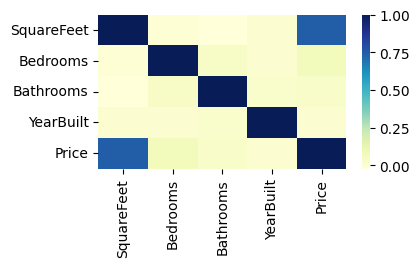

In [ ]:
# Visualize the correlation matrix using a heatmap [Run 'File access' cell before running this cell]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
sns.heatmap(housing_corr, cmap='YlGnBu')
plt.show()

In [ ]:
#From looking at the heatmap we find Price & Squarefeet has the stronger correlation, but due to relevancy of dataset we can't remove anyone of that. So, we check the next stong connection and choose it to remove.
corr_w_price = housing_corr['Price']
print(corr_w_price)


SquareFeet    0.743367
Bedrooms      0.071651
Bathrooms     0.033923
YearBuilt     0.009422
Price         1.000000
Name: Price, dtype: float64


In [ ]:
drop = 'Bedrooms'

hpp = hpp.drop(drop, axis=1)
hpp.head()

,SquareFeet,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,1,Rural,1969,215355.2836
1,2459,2,Rural,1980,195014.2216
2,1860,1,Suburb,1970,306891.0121
3,2294,1,Urban,1996,206786.7872
4,2130,2,Suburb,2001,272436.2391
